### Welcome to Python!
Over the course of this tutorial you'll learch heaps of cool things, and most importantly we'll anser the question
# Why should you care about python?

In [1]:
print('Hello World!')

Hello World!


In [2]:
# import the system library, usefull for obtaining information about the computer and python in general
import sys

In [3]:
# install and import matplotlib
!{sys.executable} -m pip install matplotlib
from matplotlib import pyplot as plt

# Symbolic math with sympy
For symbolic math python offers the sympy (SYMbolic PYthon) library.
Let's go ahead and install it

In [4]:
# install sympy
!{sys.executable} -m pip install sympy

It is possible to generate reserved variables that are treated as independent variables. Let's go ahead and try to calculate an integral

In [5]:
# import various functions and classes from sympy
from sympy import Integral, exp, symbols, oo

# define symbols for x, y and z
x, y, z = symbols('x y z')

# define an expression
expr1 = exp(-x**2 - y**2)

# define an integral
int1 = Integral(expr1, (x, -oo, oo), (y, -oo, oo))
int1

Integral(exp(-x**2 - y**2), (x, -oo, oo), (y, -oo, oo))

In [6]:
# integrals can be evaluated with the doit() function
int1.doit()

pi

In [7]:
# define a more complex integral
int2 = Integral(x**y*exp(-x), (x, 0, oo))
int2

Integral(x**y*exp(-x), (x, 0, oo))

In [8]:
# we obtain a result that depends on y
int2.doit()

Piecewise((gamma(y + 1), re(y) > -1), (Integral(x**y*exp(-x), (x, 0, oo)), True))

One can also ask for solutions of ODEs

In [9]:
from sympy import Function, dsolve, Eq, Derivative, sin, cos, simplify

# set f as a symbol for functions
f = Function('f')

# define a differential equation
eq = Derivative(f(x), x, x) + 9*f(x)
Eq(eq, 0)

Eq(9*f(x) + Derivative(f(x), (x, 2)), 0)

In [10]:
# solve the differential equation
dsolve(eq)

Eq(f(x), C1*sin(3*x) + C2*cos(3*x))

In [11]:
t = symbols('t')
x, y = symbols('x, y', cls=Function)
eq = (Eq(Derivative(x(t),t),x(t)*y(t)*sin(t)),
      Eq(Derivative(y(t),t),y(t)**2*sin(t)))
eq[0]


Eq(Derivative(x(t), t), x(t)*y(t)*sin(t))

In [12]:
eq[1]

Eq(Derivative(y(t), t), y(t)**2*sin(t))

In [13]:
sol = dsolve(eq)

In [14]:
sol.pop()

Eq(y(t), -1/(C1 - cos(t)))

In [15]:
sol.pop()

Eq(x(t), -exp(C1)/(C2*exp(C1) - cos(t)))

# Plotting with matplotlib

<IPython.core.display.Javascript object>


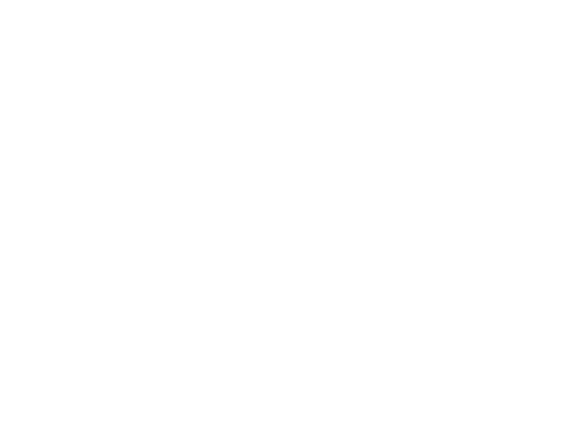

NameError: name 'np' is not defined

In [16]:
from scipy import misc, ndimage
face = misc.face()

%matplotlib notebook
plt.subplot(121)
plt.imshow(face)

face2 = np.sum(face, axis=2)/256/3
face3 = ndimage.sobel(face2)
plt.subplot(122)
plt.gray()
plt.imshow(face3)

# Handling tables with Pandas

In [ ]:
!{sys.executable} -m pip install pandas pydataset

In [ ]:
import pandas as pd
pd.__version__

In [ ]:
from pydataset import data
flights = data('AirPassengers')
flights.head()

In [ ]:

%matplotlib notebook
plt.plot(flights['time'], flights['AirPassengers'])
plt.xlabel('year')
plt.ylabel(r'passengers $\left[10^3\right]$')

In [ ]:
iris = data('iris')
print(iris['Species'].unique())
iris.head()

In [ ]:
%matplotlib notebook
for name, group in iris.groupby('Species'):
    plt.scatter(group['Sepal.Length'], group['Sepal.Width'], label = r'$%s$'%name)
    
plt.legend()
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')


In [ ]:
import numpy as np
summary_table = iris.groupby('Species').apply(np.mean)
print(summary_table.to_latex())
summary_table

In [17]:
!{sys.executable} -m pip install cartopy

In [ ]:
%matplotlib inline
import cartopy.crs as ccrs


def main():
    rotated_pole = ccrs.RotatedPole(pole_latitude=45, pole_longitude=180)

    box_top = 45
    x, y = [-44, -44, 45, 45, -44], [-45, box_top, box_top, -45, -45]

    fig = plt.figure()

    ax = fig.add_subplot(2, 1, 1, projection=rotated_pole)
    ax.stock_img()
    ax.coastlines()
    ax.plot(x, y, marker='o', transform=rotated_pole)
    ax.fill(x, y, color='coral', transform=rotated_pole, alpha=0.4)
    ax.gridlines()

    ax = fig.add_subplot(2, 1, 2, projection=ccrs.PlateCarree())
    ax.stock_img()
    ax.coastlines()
    ax.plot(x, y, marker='o', transform=rotated_pole)
    ax.fill(x, y, transform=rotated_pole, color='coral', alpha=0.4)
    ax.gridlines()

    plt.show()


if __name__ == '__main__':
    main()